# 1. Binary Classification Through Logistic Regression

In [248]:
# Imports needed for Exercise 2
import numpy as np
import matplotlib.pyplot as plt
import math as m


(1) Download the data file “data.mat” (or “data.txt” if you are not using matlab)
which contains a matrix of size 100 × 3. The first 50 rows are positive examples
(label 1) of points in 2 dimensions. The last 50 rows are negative examples (label
0) also in 2 dimensions.
The first 5 rows of the file contains the following values (with precision 2):
\begin{eqnarray}
&1.3,& -0.54,& 1\\
&-2.3,& -2.5,& 1\\
&-0.37,& -0.047,& 1\\
&0.49,& 0.79,& 1\\
&1,& 0.95,& 1
\end{eqnarray}
where the first two columns correspond to points in 2 dimensions, and the last
column is the corresponding label.

In [249]:
# We read the raw data and convert them into a list of 3-Tuples reffered as data
with open("data.txt") as f:
    read_data = f.readlines()
raw_data = [data_line.rstrip().split() for data_line in read_data ]
data = [tuple(map(lambda x: float(x), line)) for line in raw_data]
#Use a linear model of the form z = θ_0 + θ_1 x_1 + θ_2 x_2 . Don’t use a polynomial!
initial_theta_vec = np.random.uniform(-0.01,0.01,3) # the third Parameter indicates the Number of Thetas

(3) Initialize the parameters of your model with random values in the interval (−0.01, 0.01).
This is shown in the cell above, where we initialise the theta_vec

In [250]:
#saving the initial model to plot later on!
initial_theta_vec_plot = [i for i in initial_theta_vec]

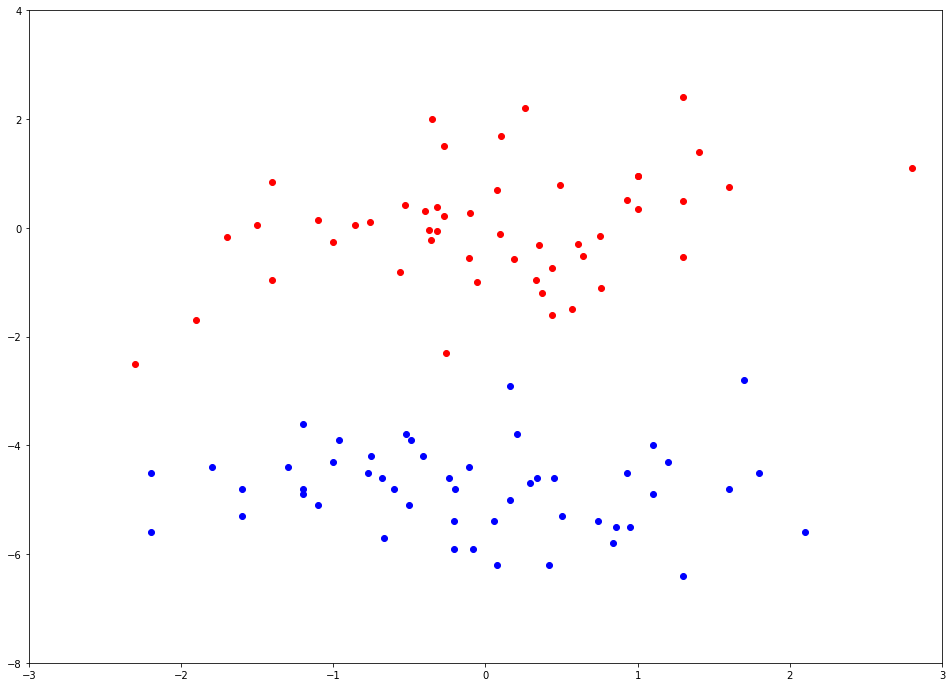

In [251]:
# We made sure that we got the right representation of the Data by comparing it to the erxercise sheet
#% matplotlib
fig = plt.figure(figsize=(36,12))
ax1 = fig.add_subplot(121)
ax1.plot([data_x[0] for data_x in data[0:50]], [data_y[1] for data_y in data[0:50]], "ro")
ax1.plot([data_x[0] for data_x in data[50:]], [data_y[1] for data_y in data[50:]], "bo")
ax1.axis([-3, 3, -8, 4])

plt.show()


(2) Implement in your favorite programming language the Logistic Regression algo-
rithm, so that you classify correctly both types of data.

The heuristic function in the following cell has the following form:
\begin{align} g(z) = \frac{1}{1+e^{-z}}\end{align}

In [252]:
#To classify the data, we first need to implement the algortihmn. 
#In this Cell we first define the heuristic function.
#This model should be evaluated in the sigmoid function g(z) = 1/ (1+e^−z) .
def heuristic_function(vec_data, theta_vec):
    return (1/(1+ np.exp(-np.matmul(theta_vec, np.transpose(vec_data)))))
    

In [253]:
# Update Rule θ_j = θ_j + α * (y^(i) - h_θ(x^(i)))*x_j^(i)
def update_rule(vec_data, theta_vec, theta_index, alpha):
    vec_data = np.append(1,vec_data)
    theta_vec[theta_index] = theta_vec[theta_index] + alpha * (vec_data[3] - heuristic_function(vec_data[0:3], theta_vec)) * vec_data[theta_index]
    return theta_vec

In [254]:
# here we implement the stochastic logristic regression mentioned in the lecture
def stochastic_linear_regression(data, theta_vec, alpha, steps):
    for step in range(steps):
        for vec_data in data:
            for theta_j in range(len(theta_vec)):
                theta_vec = update_rule(vec_data, theta_vec, theta_j, alpha)
    return theta_vec
                

In [255]:
# Starting the Algorithmn
theta_vec = stochastic_linear_regression(data, initial_theta_vec, 0.1, 100)

In [256]:
#Once your algorithm has estimated the correct vector of parameters θ, you can plot
#such model (the black line) using the function x_2 = (θ_0 + θ_1 x_1)(−1/θ_2).
def plot_func_x2(x1, theta_vec_decision):
    return (theta_vec_decision[0] + theta_vec_decision[1]*x1)*(-1/theta_vec_decision[2])

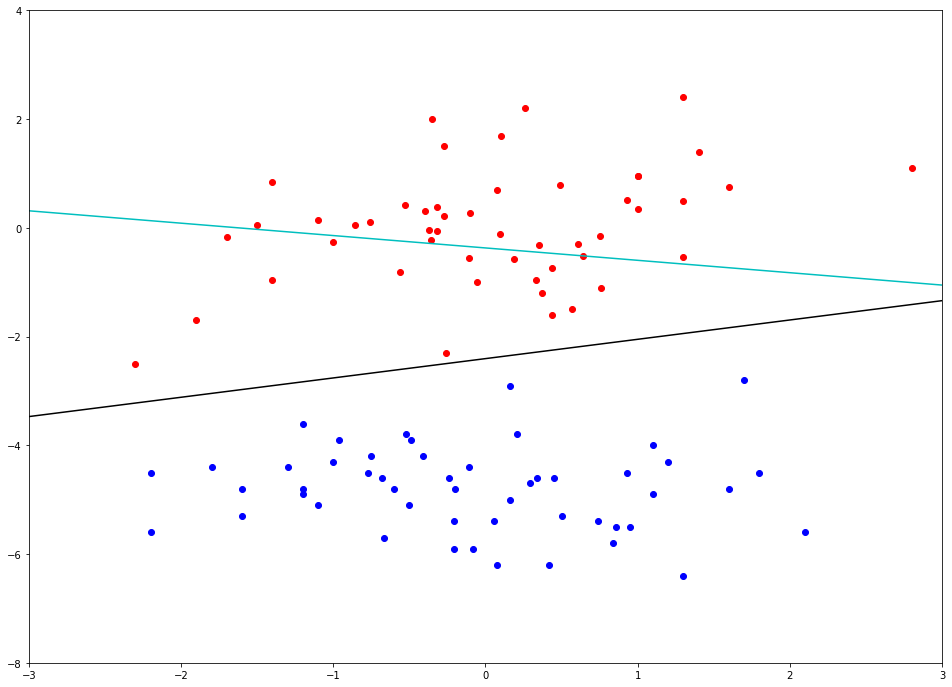

In [262]:
'''The solution should looks like the following plot, where the blue line is the initial
model (with random parameters) and the black line is the final answer, after 100
iterations.'''
fig = plt.figure(figsize=(36,12))
ax1 = fig.add_subplot(121)
ax1.plot([data_x[0] for data_x in data[0:50]], [data_y[1] for data_y in data[0:50]], "ro")
ax1.plot([data_x[0] for data_x in data[50:]], [data_y[1] for data_y in data[50:]], "bo")
ax1.plot([-3,3],[plot_func_x2(-3,initial_theta_vec_plot),plot_func_x2(3,initial_theta_vec_plot)], "c" )
ax1.plot([-3,3],[plot_func_x2(-3,theta_vec),plot_func_x2(3,theta_vec)], "#000000" ) #black line
ax1.axis([-3, 3, -8, 4], "c")

plt.show()


(4) Plot the data points using one color for each class of data. Also, plot the classifier
line that you found using logistic regression.
In the above picture the blue line shows the initial model, where the black line our final models presents. As we can see the model distinguesh between span and not span interpreted by the input data.

(5) Prepare a report containing your final model (including parameters), your final α
value, and your graph. The following cell shows our final model and so on. 

In [267]:
print(theta_vec,"Final Model with 100 iterations")
print(initial_theta_vec_plot, "initial Model")
print("alpha = 0.1")

(array([ 8.61480718, -1.27337188,  3.58310499]), 'Final Model with 100 iterations')
([0.0277410152201929, 0.017153643105834157, 0.07532761493779949], 'initial Model')
alpha = 0.1


Experimental This is for expiremantal purpuses not for the contribution.

In [283]:
# We read the raw data and convert them into a list of 3-Tuples reffered as data
with open("data.txt") as f:
    read_data = f.readlines()
raw_data = [data_line.rstrip().split() for data_line in read_data ]
data = [tuple(map(lambda x: float(x), line)) for line in raw_data]
#Use a linear model of the form z = θ_0 + θ_1 x_1 + θ_2 x_2 . Don’t use a polynomial!
initial_theta_vec = np.random.uniform(-0.01,0.01,3) # the third Parameter indicates the Number of Thetas
#saving the initial model to plot later on!
initial_theta_vec_plot = [i for i in initial_theta_vec]
# Starting the Algorithmn
theta_vec = stochastic_linear_regression(data, initial_theta_vec, -0.1, 10)

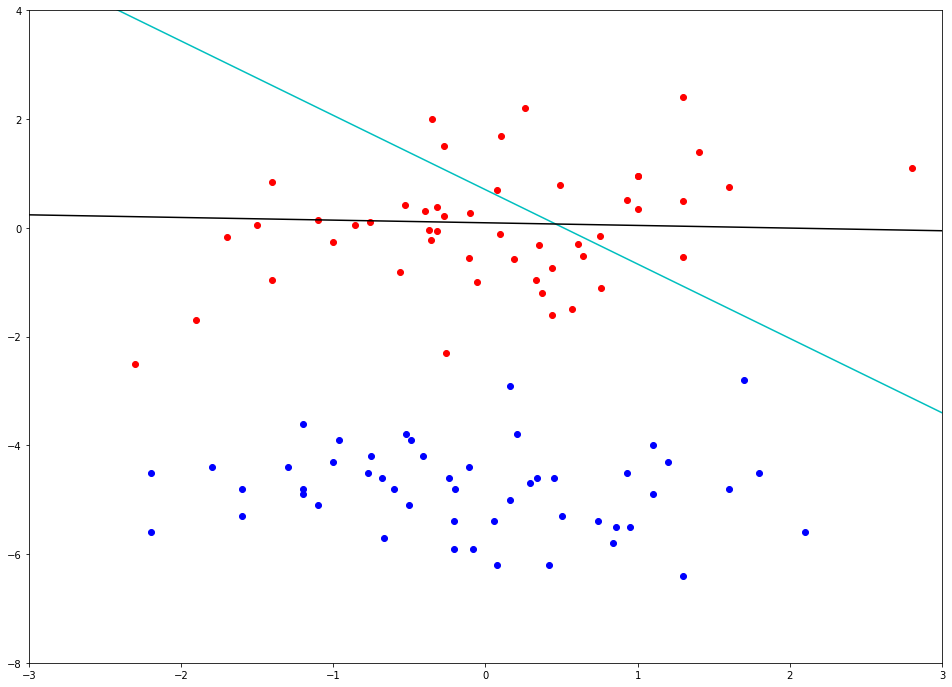

In [284]:
'''This is for expiremantal purpuses not for the contribution.'''
fig = plt.figure(figsize=(36,12))
ax1 = fig.add_subplot(121)
ax1.plot([data_x[0] for data_x in data[0:50]], [data_y[1] for data_y in data[0:50]], "ro")
ax1.plot([data_x[0] for data_x in data[50:]], [data_y[1] for data_y in data[50:]], "bo")
ax1.plot([-3,3],[plot_func_x2(-3,initial_theta_vec_plot),plot_func_x2(3,initial_theta_vec_plot)], "c" )
ax1.plot([-3,3],[plot_func_x2(-3,theta_vec),plot_func_x2(3,theta_vec)], "#000000" ) #black line
ax1.axis([-3, 3, -8, 4], "c")

plt.show()


In [282]:
initial_theta_vec_plot

[-0.08735408367416492, -0.023771771908479927, 0.019002601043426173]